# Pixel binning

Pixel binning to optimize S/N ratios of the spatially resolved SEDs

In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
filters = ['hst_acs_f435w', 'hst_acs_f475w', 'hst_acs_f606w', 'hst_acs_f814w', 
           'jwst_nircam_f090w',  'jwst_nircam_f115w', 'jwst_nircam_f150w', 'jwst_nircam_f200w', 
           'jwst_nircam_f277w', 'jwst_nircam_f356w', 'jwst_nircam_f410m', 'jwst_nircam_f444w']
nbands = len(filters)

In [4]:
# Run pixel binning using the pixel_binning function

from piXedfit.piXedfit_bin import pixel_binning

fits_fluxmap = "fluxmap_whl0137_z2.fits"

SNR = np.zeros(nbands)
SNR[5:nbands] = 5.0      # S/N>5 in F115W, F150W, F200W, F277W, F356W, F410M, and F444W
pixel_binning(fits_fluxmap, ref_band=8, Dmin_bin=1.0, SNR=SNR, redc_chi2_limit=5.0, del_r=1.0, name_out_fits=None)

Bins: 673 ==> accumulated pixels: 4201/4201
Number of bins: 673


'pixbin_fluxmap_whl0137_z2.fits'

## Plot binning map

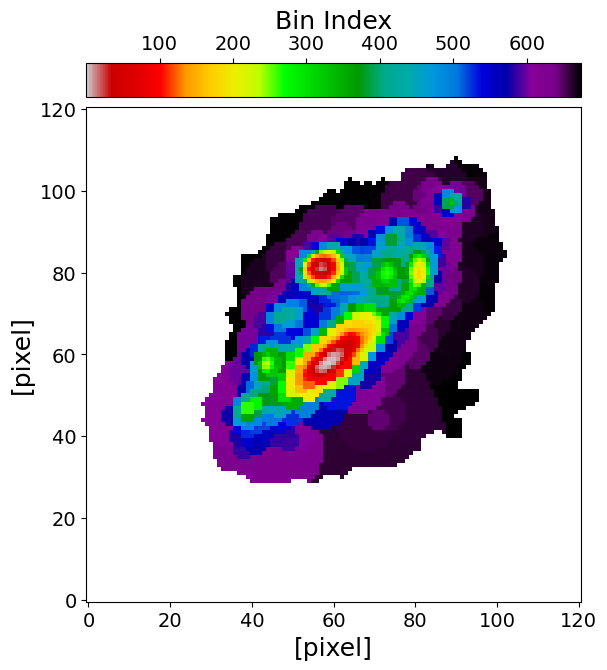

In [5]:
%matplotlib inline

from piXedfit.piXedfit_bin import plot_binmap

binmap_fits = "pixbin_%s" % fits_fluxmap
plot_binmap(binmap_fits)

## Plot SEDs of spatial bins

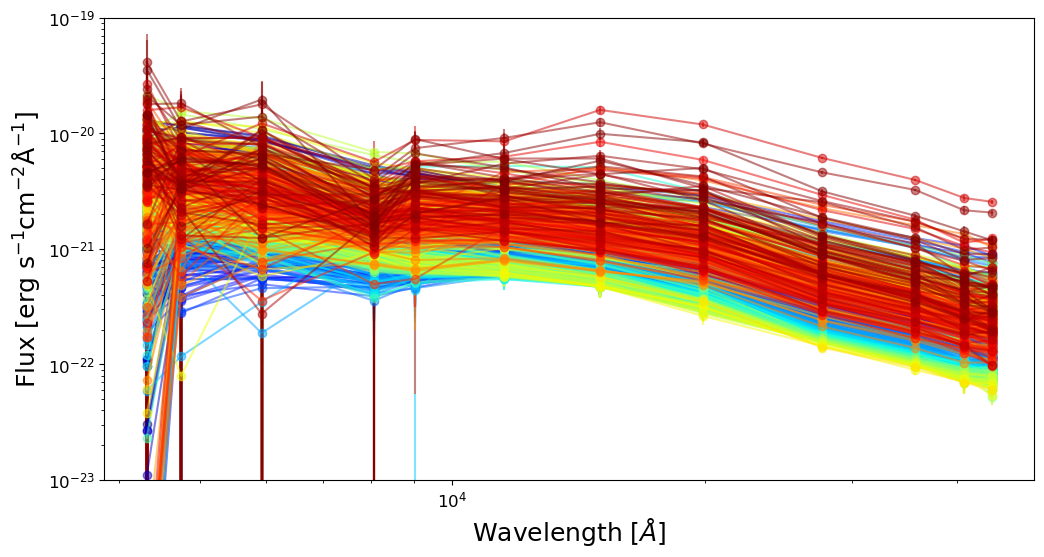

In [11]:
from piXedfit.piXedfit_bin import plot_bins_SED

plot_bins_SED(binmap_fits, logscale_x=True, yrange=[1e-23,1e-19])

## Plot radial profiles of S/N ratios

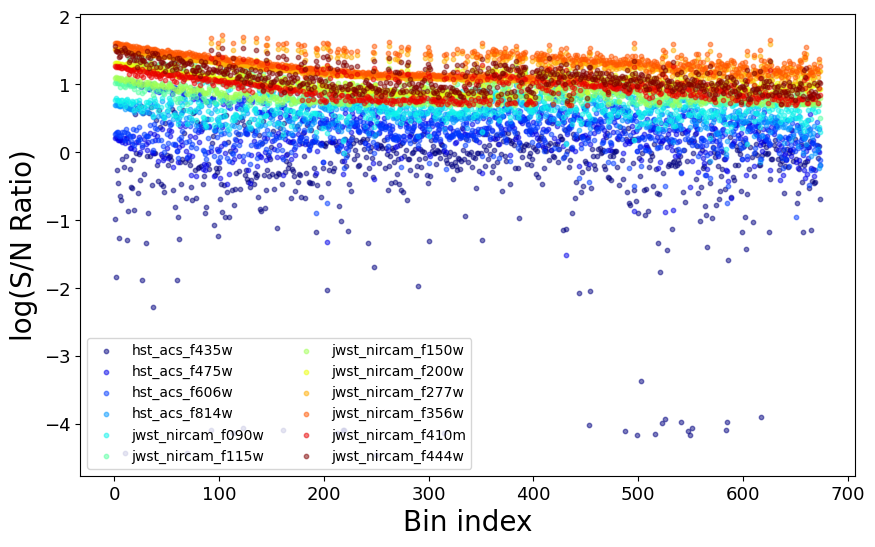

In [12]:
from piXedfit.piXedfit_bin import plot_bins_SNR_radial_profile

plot_bins_SNR_radial_profile(binmap_fits)